In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')

In [3]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


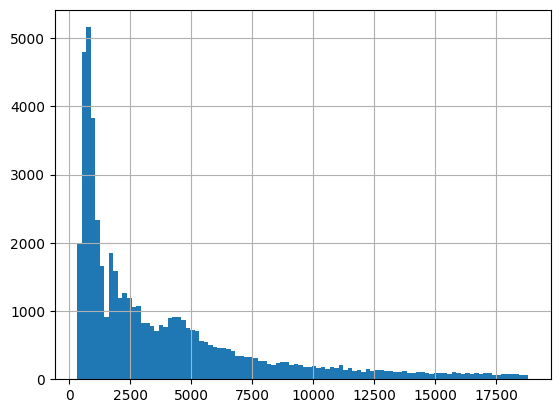

In [4]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [5]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [6]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [7]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [8]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [9]:
diamonds_df[features]

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,1,1,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,1,61.0,58.0,6.15,6.12,3.74


In [10]:
X[0]

array([ 0.23,  4.  ,  1.  ,  1.  , 61.5 , 55.  ,  3.95,  3.98,  2.43])

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

# Обучаем модель линейной регрессии

In [13]:
reg = LinearRegression().fit(X_train, y_train)

In [14]:
y_pred = reg.predict(X_test)

In [15]:
score = r2_score(y_pred, y_test)

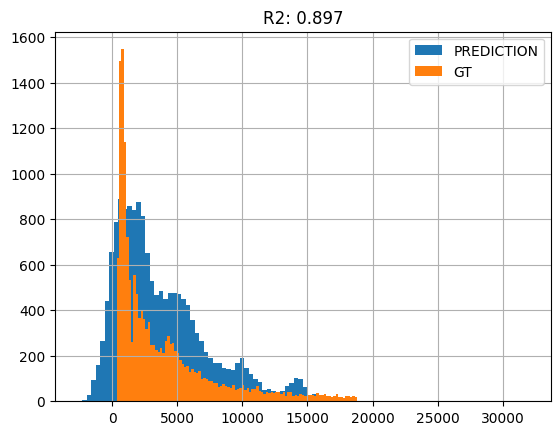

In [16]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Реализация линейной регрессии

In [17]:
def generate_batch(X, size):
    indexes = np.random.randint(0, X.shape[0], size)
    return X[indexes, :], indexes

In [18]:
class LinRegressor:
    def __init__(self,
                 learning_rate=0.3,
                 max_iter=500,
                 delta=0.01,
                 batch_size=10000
                ):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.delta = delta
        self.batch_size = batch_size

    def __init_weights(self, size):
        weights = np.zeros(size)
        return weights

    def __init_biases(self, size):
        bias = np.zeros(size)
        return bias

    def __predict(self, X):
        return np.dot(X, self.weights[:, np.newaxis]) + self.biases[:, np.newaxis]
        
    def __mse(self, pred, ans):
        return np.mean((pred - ans)**2)

    def __mse_derivative(self, pred, ans):
        return (-2 * (ans - pred) / ans.shape[0])

    def predict(self, X):
        return self.__predict(X)

    def loss(self, y_pred, ans):
        return self.__mse(y_pred, ans)

    def train(self, X, y, plotting=True):
        epoch = 1
        self.weights = self.__init_weights(X.shape[1])
        self.biases = self.__init_biases(1)

        batch, indexes = generate_batch(X, self.batch_size)
        answers = y[indexes]
        old_error = self.loss(self.predict(batch), answers)
        
        if plotting:
            errors = []
            fig = plt.figure(figsize=(15, 10))
            ax1 = fig.add_subplot(221)
            fig.suptitle("loss")
            
        while True:
            self.__fit_weights(batch, answers)
            new_error = self.loss(self.predict(batch), answers)
            
            if plotting:
                errors.append(new_error)
                
            difference = old_error - new_error

            print(f"epoch {epoch}: error={new_error}")
            
            if epoch > self.max_iter:
                break

            batch, indexes = generate_batch(X, self.batch_size)
            answers = y[indexes]
            old_error = new_error

            epoch += 1

        if plotting: 
                    ax1.clear()
                    ax1.plot(range(1, epoch + 1), errors)
                    fig.canvas.draw()

    def __fit_weights(self, X, y):
        y_pred = (np.dot(X, self.weights) + self.biases)
        #print(y.shape)
        #print(y_pred.reshape(y.shape).shape)
        dLdy = self.__mse_derivative(y_pred.reshape(y.shape), y) #new
        #print(f"dLdy:{dLdy.shape}")
        #deriv_weight = -(2 * np.dot(X.T, y - y_pred.reshape(y.shape))) / X.shape[0]
        deriv_weight = np.dot(X.T, dLdy)
        #print(f"Deriv_weight:{deriv_weight}")
        deriv_biases = -(2 * np.sum(y - y_pred.reshape(y.shape))) / X.shape[0]
        self.weights -= self.learning_rate * deriv_weight.flatten()
        self.biases -= self.learning_rate * deriv_biases.flatten()

In [19]:
l = LinRegressor(max_iter=500)

epoch 1: error=20537043.130434837
epoch 2: error=16417221.507202702
epoch 3: error=14269810.286203304
epoch 4: error=14241075.797743548
epoch 5: error=13717768.648865417
epoch 6: error=13284121.997660486
epoch 7: error=13383459.634798747
epoch 8: error=12900275.76427648
epoch 9: error=12214911.141854111
epoch 10: error=12073995.219168643
epoch 11: error=11842978.164450629
epoch 12: error=11639162.885053668
epoch 13: error=11238868.091628518
epoch 14: error=11334097.325152367
epoch 15: error=10898315.460050639
epoch 16: error=10864909.305979703
epoch 17: error=10976372.454502264
epoch 18: error=10532338.186009232
epoch 19: error=10922953.352625074
epoch 20: error=10183312.776662637
epoch 21: error=9955360.272631614
epoch 22: error=9729385.50310836
epoch 23: error=10185277.574963171
epoch 24: error=9770788.164138997
epoch 25: error=9350783.997481052
epoch 26: error=9875545.929725524
epoch 27: error=9493574.978670187
epoch 28: error=8799937.455455206
epoch 29: error=9162648.123496342
epoc

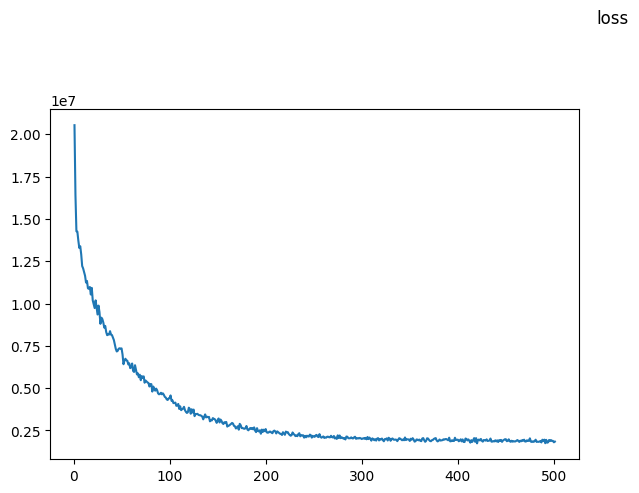

In [20]:
l.train(X_train, y_train, plotting=True)

In [21]:
ans = l.predict(X_test)
r2_score(ans, y_test)

0.8610144739770061

# Создаём модель MLP для задачи регрессии

In [22]:
class Layer():
    def __init__(self):
        self.input = None
        self.output = None

    def forward_propagation(self, input):
        pass

    def backward_propagation(self, output_gradient):
        pass

    def step(self, learning_rate):
        pass
    

In [23]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size)
        self.biases = np.random.rand(output_size)

    def forward_propagation(self, input):
        self.input = input
        prediction = np.dot(self.input, self.weights) + self.biases
        return prediction
        
    def backward_propagation(self, dLdy):
        self.dLdW = np.dot(self.input.T, dLdy)
        self.dLdb = dLdy.sum(0)
        dLdx = np.dot(dLdy, self.weights.T)
        return dLdx

    def step(self, learning_rate):
        self.weights -= learning_rate * self.dLdW
        self.biases -= learning_rate * self.dLdb

In [24]:
class Activation(Layer):
    def __init__(self, activation, activation_derivative):
        self.activation = np.vectorize(activation)
        self.activation_derivative = np.vectorize(activation_derivative)

    def forward_propagation(self, input):
        self.result = self.activation(input)
        return self.result

    def backward_propagation(self, dLdy):
        return self.activation_derivative * dLdy

In [25]:
class NeuralNetwork:
    def __init__(self, modules):
        self.modules = modules
    
    def forward(self, X):
        y = X
        for i in range(len(self.modules)):
            y = self.modules[i].forward_propagation(y)
        return y
    
    def backward(self, dLdy):
        for i in range(len(self.modules))[::-1]:
            dLdy = self.modules[i].backward_propagation(dLdy)
    
    def step(self, learning_rate):
        for i in range(len(self.modules)):
            self.modules[i].step(learning_rate)

In [26]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward_propagation(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.s = 1./(1+np.exp(-X))
        return self.s
    
    def backward_propagation(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return self.s*(1-self.s)*dLdy
    
    def step(self, learning_rate):
        pass

In [27]:
def linear(x):
    return x

def linear_derivative(x):
    return 1.0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.max([0, x])

def relu_derivative(x):
    if x > 0:
        return 1
    else:
        return 0

def mse(ans, pred):
    return np.mean((ans - pred)**2)

def mse_derivative(ans, pred):
    return (-2 * (ans - pred) / ans.shape[0])

In [31]:
class MLPRegressor:
    def __init__(
        self,
        hidden_layer_sizes=(100,),
        learning_rate=0.0001,
        max_iter=10,
        delta=0.01,
        batch_size=1000,
    ):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.delta = delta
        self.batch_size = batch_size
        self.layers = []

    def create_configuration(self, input_size):
        for layer_size in self.hidden_layer_sizes:
            new_layer = (Dense(input_size, layer_size), Sigmoid())
            self.layers.extend(new_layer)
            input_size = layer_size

        self.layers.append(Dense(input_size, 1))
        self.network = NeuralNetwork(self.layers)
            
    def train(self, X, y, plotting=True):
        iter = 1
        
        if plotting:
            errors = []
            fig = plt.figure(figsize=(15, 10))
            ax1 = fig.add_subplot(221)
            fig.suptitle("loss")
            
        self.create_configuration(X.shape[1])
        
        while iter <= self.max_iter:
            #print(self.network.modules[0].W.shape)
            
            batch, indexes = generate_batch(X, self.batch_size)
            answers = y[indexes]
            #batch = X
            #print(batch.shape)
            #answers = y
            predicted = self.network.forward(batch)
            #print(f"predicted:{predicted[:10]}")
                                
            error = mse(answers, predicted)
            
            if plotting:
                errors.append(error)
                
            print(f"Iteration {iter}: error={error}")
            dLdy = mse_derivative(answers, predicted.reshape(answers.shape))
            self.network.backward(dLdy)
            self.network.step(self.learning_rate)
        
            if plotting: 
                ax1.clear()
                ax1.plot(range(1, iter + 1), errors)
                #time.sleep(0.5)
                fig.canvas.draw()

            iter += 1
                
    def predict(self, X):
        predicted = []
        for sample in X:
            output = sample
            for layer in self.layers:
                output = layer.forward_propagation(output).flatten()
            predicted.append(output)
        return predicted

Iteration 1: error=31594387.8585281
Iteration 2: error=16578747.132069418
Iteration 3: error=14800668.671133736
Iteration 4: error=14394178.910921637
Iteration 5: error=14489638.74455019
Iteration 6: error=13839086.493839966
Iteration 7: error=13683420.706651388
Iteration 8: error=13187188.70609809
Iteration 9: error=12926109.345967958
Iteration 10: error=12923063.342643041
Iteration 11: error=12756921.078773085
Iteration 12: error=12497568.203927878
Iteration 13: error=12476669.906274593
Iteration 14: error=12146633.624879654
Iteration 15: error=11962294.592805728
Iteration 16: error=11885515.729826411
Iteration 17: error=11473547.555772677
Iteration 18: error=11107012.39816227
Iteration 19: error=11142182.318400813
Iteration 20: error=11046313.128293008
Iteration 21: error=10743657.6254704
Iteration 22: error=10571941.995801477
Iteration 23: error=10569032.107388075
Iteration 24: error=10173764.428093923
Iteration 25: error=10186396.057918716
Iteration 26: error=10328172.833391597
It

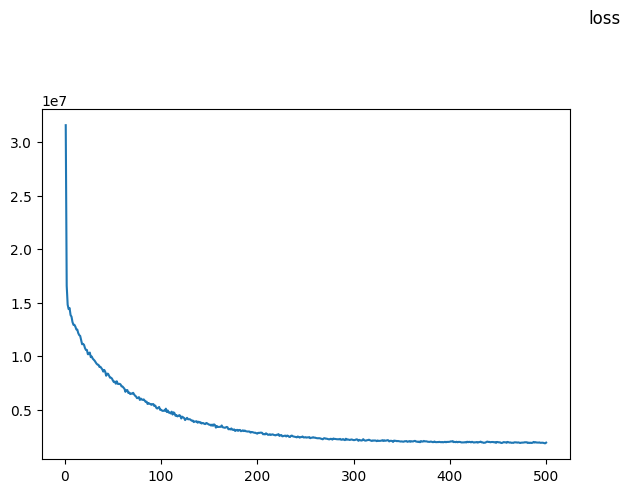

In [39]:
model = MLPRegressor(hidden_layer_sizes=(),
                    learning_rate=0.25, 
                    batch_size=30000,
                    max_iter=500)

model.train(X_train, y_train)

# Проверяем модель MLP на выборке Diamonds

In [290]:
predict = model.predict(X_test)

In [291]:
mse(y_test, predict)

4267307.023658551

In [292]:
r2_score(y_test, predict)

0.7315162281131193